Before we start, **please make sure you have installed the required packages**.

In [1]:
import pickle
import matplotlib.pyplot as plt
import torch
from common import BIN_WIDTH,BIN_HEIGHT
from loader import Model

### 1. Explore the dataset

In [2]:
# load the dataset
data=pickle.load(open('dataset/G200_test_100.pkl','rb'))

In [3]:
# it contains 100 days
len(data)

100

In [4]:
# we will only use the first 3 days
data=data[:3]

In [5]:
# each day contains many customer orders
[len(i) for i in data]

[197, 261, 279]

In [6]:
# see the items of Day 1 and customer order 2
# it is a list of items
order=data[1][2]
print(order)

[[168, 70], [668, 80], [452, 70], [390, 95], [562, 362], [213, 135], [664, 100], [717, 354], [180, 69], [622, 358]]


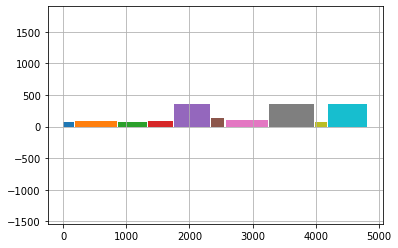

In [7]:
# visualize
x=0
for w,h in order:
    plt.fill([x,x+w,x+w,x,x],[0,0,h,h,0])
    x+=w+20
plt.axis('equal')
plt.grid()

### 2. Load model and optimize

In [8]:
# load the models
model=Model(
    upper_model_path='./pretrained/Upper_200',
    lower_model_path='./pretrained/Lower_200',
    cuda=0 if torch.cuda.is_available() else -1
)

In [9]:
# get the optimization results
# here we will optimize for 50 steps
usages,result=model.optimize(dataset=data,max_parts=200,show_tqdm=True,num_steps=50)

100%|██████████| 50/50 [00:09<00:00,  5.01it/s]


### 3. Visualize the results

The `usage` variable contains the average bin usage curve during the optimization process

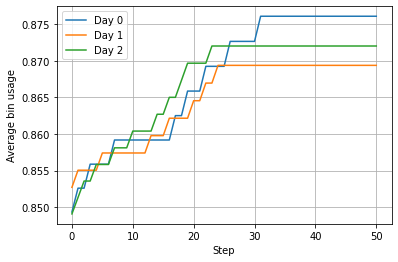

In [10]:
plt.plot(usages)
plt.xlabel('Step')
plt.ylabel('Average bin usage')
plt.legend([f'Day {i}' for i in range(len(usages[0]))])
plt.grid()

The `result` variable has the following structure:

```python
[
    # Day 0
    [
        # Group 0
        {
            # the index of the orders contained in the group
            'order': [0,3,7,9],
            # the items contained in this group
            'item': [[1,3], [5,7], ...],
            # the bin packing plan, given as the position for items
            # [bin_id, x, y, w, h]
            # (x,y) is the position of the lower left corner of each item
            'pos': [[0,0,0,1,3], ...]
        },
        ...
    ],
    ...
]
```

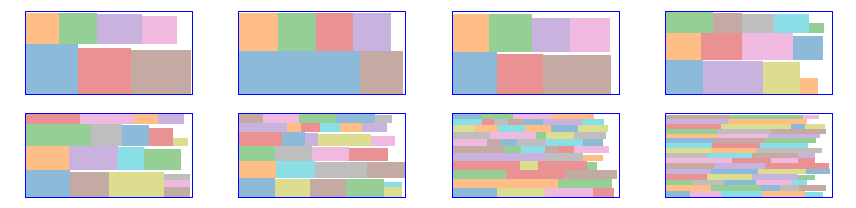

In [11]:
def visualize(pos,ncol=4):
    nrow = (pos[-1][0] + ncol - 1) // ncol
    p = -1
    for b,x,y,w,h in pos:
        if b != p:
            p = b
            plt.subplot(nrow, ncol, b + 1)
            plt.plot([0, BIN_WIDTH, BIN_WIDTH, 0, 0], [0, 0, BIN_HEIGHT, BIN_HEIGHT, 0], 'b', lw=1)
            plt.axis('equal')
            plt.axis('off')
        plt.fill([x, x + w, x + w, x], [y, y, y + h, y + h], lw=0, alpha=0.5)
    w = min(3 * ncol, 20)
    plt.gcf().set_size_inches(w, w / 2 * nrow / ncol)
    plt.tight_layout()
    
# let's see the bin packing plan for Day 0 group 1
visualize(result[0][1]['pos'])